train the model 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Projectsfolder/machinelearning/preprocessdata/"

In [ ]:

import numpy as np
#load the data 
data=np.load(path+'data.npy')
target=np.load(path+'target.npy')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model=Sequential()


#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

#Dense layer of50 neurons
model.add(Dense(50,activation='relu'))

#final layer two output 
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
170/170 [==============================] - 403s 2s/step - loss: 0.6298 - accuracy: 0.6489 - val_loss: 0.5539 - val_accuracy: 0.7007
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
170/170 [==============================] - 399s 2s/step - loss: 0.4968 - accuracy: 0.7627 - val_loss: 0.4243 - val_accuracy: 0.8059
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
170/170 [==============================] - 398s 2s/step - loss: 0.3667 - accuracy: 0.8358 - val_loss: 0.4055 - val_accuracy: 0.8147
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
170/170 [==============================] - 399s 2s/step - loss: 0.2853 - accuracy: 0.8773 - val_loss: 0.3513 - val_accuracy: 0.8456
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
170/170 [==============================] - 399s 2s/step - loss: 0.2322 - accuracy: 0.9034 - val_loss: 0.3259 - val_accuracy: 0.8544
INFO:tensorflow:Assets written to: model-005.model/as

visulation

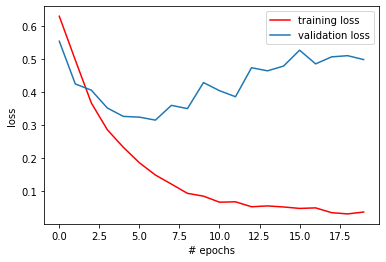

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

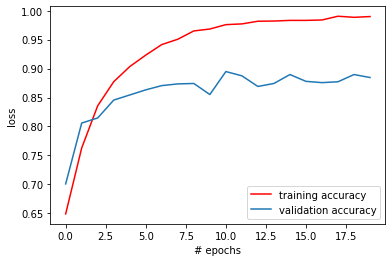

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

24/24 [==============================] - 13s 557ms/step - loss: 0.3861 - accuracy: 0.8942
[0.38612687587738037, 0.8941798806190491]


In [ ]:
modelpath = "/content/drive/MyDrive/Projectsfolder/machinelearning/modelsave/"

In [ ]:
from keras.models import model_from_json 

In [ ]:
json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(json)

In [ ]:
json = model.to_json()
with open(modelpath+"model.json","w") as json_file:
  json_file.write(json)

In [ ]:
!mkdir -p saved_model
model.save(modelpath+'saved_model/my_model')
model.save('savemodel.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projectsfolder/machinelearning/modelsave/saved_model/my_model/assets
INFO:tensorflow:Assets written to: savemodel.model/assets


In [ ]:
model.save(modelpath+'savetrainmodel.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projectsfolder/machinelearning/modelsave/savetrainmodel.model/assets


In [ ]:
model.save(modelpath+"model_save.h5")
model.save_weights(modelpath+"model_weights.h5")